# Nueva sección

In [ ]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from sklearn.cluster import KMeans
from PIL import Image
import os

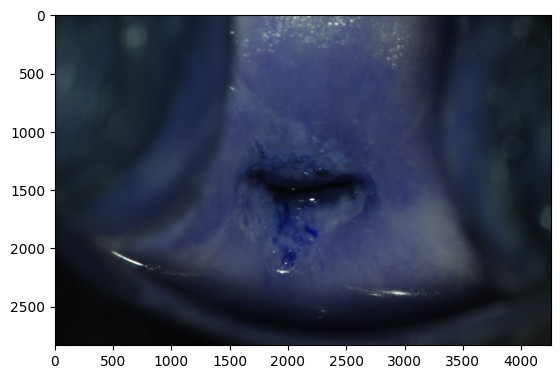

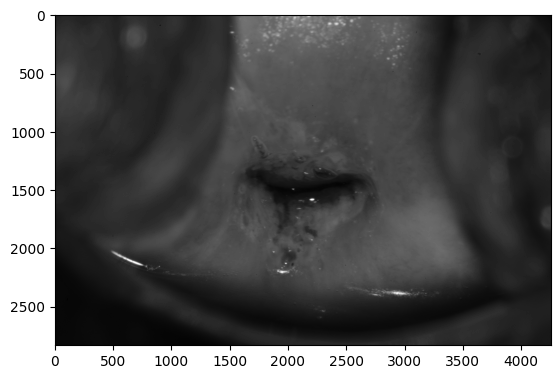

In [ ]:
#Usando KMEANS
#Cargar imagen RGB
imagen = cv2.imread('I110935.jpg')
plt.imshow(imagen)
plt.show()

#Imagen en escala de grises
imgGray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray,'gray')
plt.show()


In [ ]:
ruta = "/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes"
lista_archivos = os.listdir(ruta)
print(len(lista_archivos))
Archivo = lista_archivos[0]
Archivo

1050


'306.jpg'

 **Para archivos faltantes**

In [ ]:
import os
def verificar_archivo_en_lista(lista_archivos, nombre_archivo):
    return nombre_archivo in lista_archivos

In [ ]:
rutaKmeans = "/content/drive/MyDrive/PROYECTO_GRADO/Kmeans/"
lista_archKmeans = os.listdir(rutaKmeans)
Archivos_faltantes = lista_archivos
for i in range (len(lista_archKmeans)):
  if verificar_archivo_en_lista(lista_archivos, lista_archKmeans[i]):
    Archivos_faltantes.remove(lista_archKmeans[i])


In [ ]:
len(Archivos_faltantes)

0

In [ ]:
for i in range (len(Archivos_faltantes)):
  ArchivoF = Archivos_faltantes[i]
  #Ruta de imagen
  rutaImgF = '/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/' + ArchivoF
  Mascara_KmeansFaltantes = Kmeans(rutaImgF,2)
  guardar(Mascara_KmeansFaltantes, ArchivoF)

In [ ]:
def Kmeans(img,k):
  imagen = cv2.imread(img)
  # Convierte la imagen de BGR a RGB (OpenCV almacena las imágenes en formato BGR)
  imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
  imagen_rgb = cv2.resize(imagen_rgb, (500,500))

  # Obtén las dimensiones de la imagen
  filas, columnas, _ = imagen_rgb.shape

  # Reorganiza los píxeles para aplicar K-means
  imagen_reorganizada = imagen_rgb.reshape(-1, 3)

  # Aplica K-means
  k_means = KMeans(n_clusters=k, random_state=42)
  k_means.fit(imagen_reorganizada)
  etiquetas = k_means.labels_
  centros = k_means.cluster_centers_

  # Asigna los colores de los clústeres a cada píxel
  imagen_resultante = centros[etiquetas].reshape(filas, columnas, 3).astype(np.uint8)
  imagen_gris = cv2.cvtColor(imagen_resultante, cv2.COLOR_RGB2GRAY)
  #_, imagen_binaria = cv2.threshold(imagen_gris, umbral, 255, cv2.THRESH_BINARY)

  return imagen_gris

In [ ]:
def guardar(imagenbn, nombreArchivo):
  # Convertir la máscara a objeto de imagen
  mask_image = Image.fromarray(imagenbn)

  # Guardar la máscara
  ruta = '/content/drive/MyDrive/PROYECTO_GRADO/Kmeans_2/' + nombreArchivo
  mask_image.save(ruta)


Guardar archivos faltantes

Guardar Archivos

In [ ]:
for i in range (len(lista_archivos)):
  Archivo = lista_archivos[i]
  #Ruta de imagen
  rutaImg = '/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/' + Archivo
  Mascara_Kmeans = Kmeans(rutaImg,2)
  guardar(Mascara_Kmeans, Archivo)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# no es funcion

In [ ]:
imagen_2 = io.imread("AAHE.jpg")/255.0
imagen_2 = np.delete(imagen_2,(1), axis = 0)

(600, 800, 3)


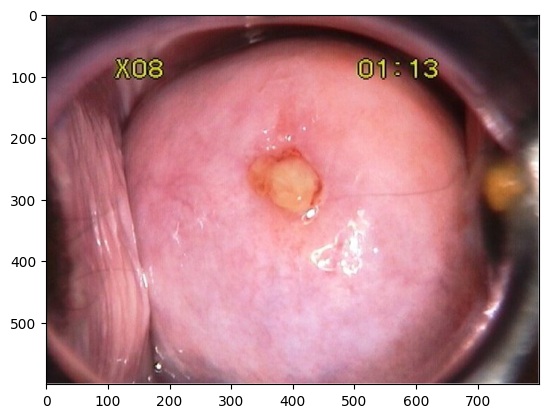

<ipython-input-12-dda6e0d7235b>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I2 = np.asarray(I1,dtype=np.float)


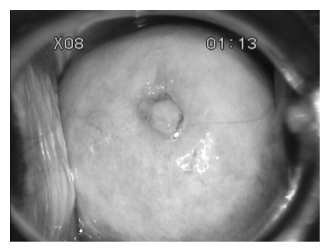

(480000, 1)


TypeError: ignored

In [ ]:
I = Image.open("AAHE.jpg")
plt.imshow(I)
print(np.shape(I))
plt.show()

I1 = I.convert('L')
I2 = np.asarray(I1,dtype=np.float)

plt.figure(figsize=(4,4))
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.show()

x = I2.reshape((-1, 1))
print(np.shape(x))
k_means = KMeans(n_clusters= k)
k_means.fit(x)

centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
I2_compressed = np.choose(etiquetas, centroides)
I2_compressed.shape = I2.shape
print(np.shape(I2_compressed.shape))

plt.figure(figsize=(4,4))
plt.imshow(I2_compressed,cmap='gray')
plt.axis('off')
plt.show()


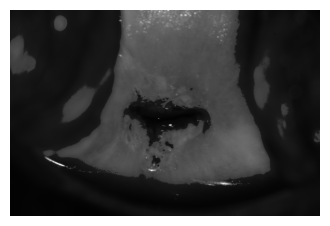

In [ ]:
I_compressed = np.multiply(I2_compressed, I2)

plt.figure(figsize=(4, 4))
plt.imshow(I_compressed, cmap='gray')
plt.axis('off')
plt.show()

# Fuzzy

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=7bb7e93db4fcc9d7587a2c7fae87290f23bfd2668b95d99575f6ef418dbce401
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
import skfuzzy as fuzz
import cv2

In [ ]:
# Cargar una imagen de ejemplo
img = cv2.imread('I117194.jpg')

# Convertir la imagen en una matriz de datos
X = img.reshape((-1, 1))


In [ ]:
# Calcular los centros de los clusters y las pertenencias difusas
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, 3, 2, error=0.005, maxiter=10, init=None)


In [ ]:
# Obtener la etiqueta de cluster para cada píxel
labels = np.argmax(u, axis=0)


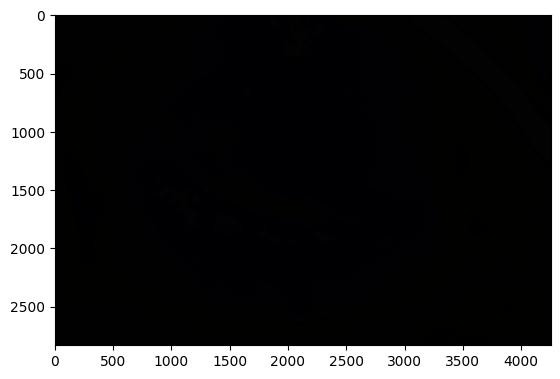

In [ ]:
# Mostrar la imagen segmentada
img_segmented = labels.reshape(img.shape)
plt.imshow(img_segmented)
plt.show()

# textura

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, segmentation, color, filters, feature

In [ ]:
# Leer la imagen
image = io.imread('I117194.jpg')

# Calcular la textura local binaria (LBP)
lbp = feature.local_binary_pattern(color.rgb2gray(image), 8, 2)

# Aplicar un umbral para obtener una imagen binaria
binary = lbp > filters.threshold_otsu(lbp)


In [ ]:
# Aplicar segmentación por watershed
segments = segmentation.watershed(filters.sobel(color.rgb2gray(image)), markers=900, compactness=0.001)

# Aplicar la segmentación por región
segmented = color.label2rgb(segments, image, kind='avg')


In [ ]:
SegmentacionBinary = segmentation.watershed(binary, markers=1000, compactness=0.001)
segmented2 = color.label2rgb(SegmentacionBinary, image, kind='avg')

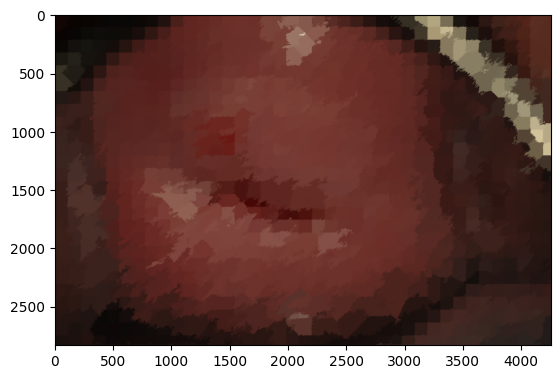

In [ ]:
plt.imshow(segmented2,'gray')
plt.show()

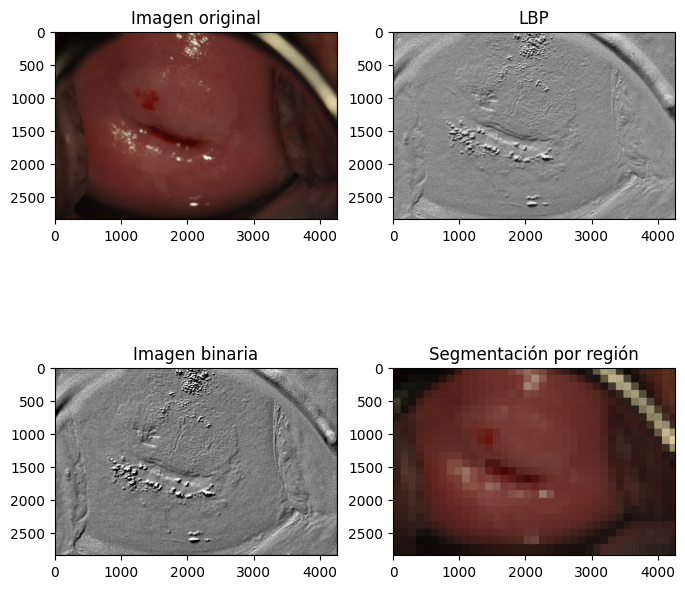

In [ ]:
# Visualizar los resultados
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0, 0].imshow(image)
ax[0, 0].set_title('Imagen original')
ax[0, 1].imshow(lbp, cmap='gray')
ax[0, 1].set_title('LBP')
ax[1, 0].imshow(binary, cmap='gray')
ax[1, 0].set_title('Imagen binaria')
ax[1, 1].imshow(segmented)
ax[1, 1].set_title('Segmentación por región')
plt.show()